In [17]:
# import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#loading dataset
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
#feature variables
x=df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
#target variable
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [56]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [69]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
print (y_pred)

[0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [70]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 69.48051948051948


In [71]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[78, 21],
       [26, 29]], dtype=int64)

In [72]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.79      0.77        99
           1       0.58      0.53      0.55        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



In [73]:
#checking prediction value
model.predict([[6,148,72,35,0,33.6,0.627,50]])


array([1], dtype=int64)

In [74]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [75]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

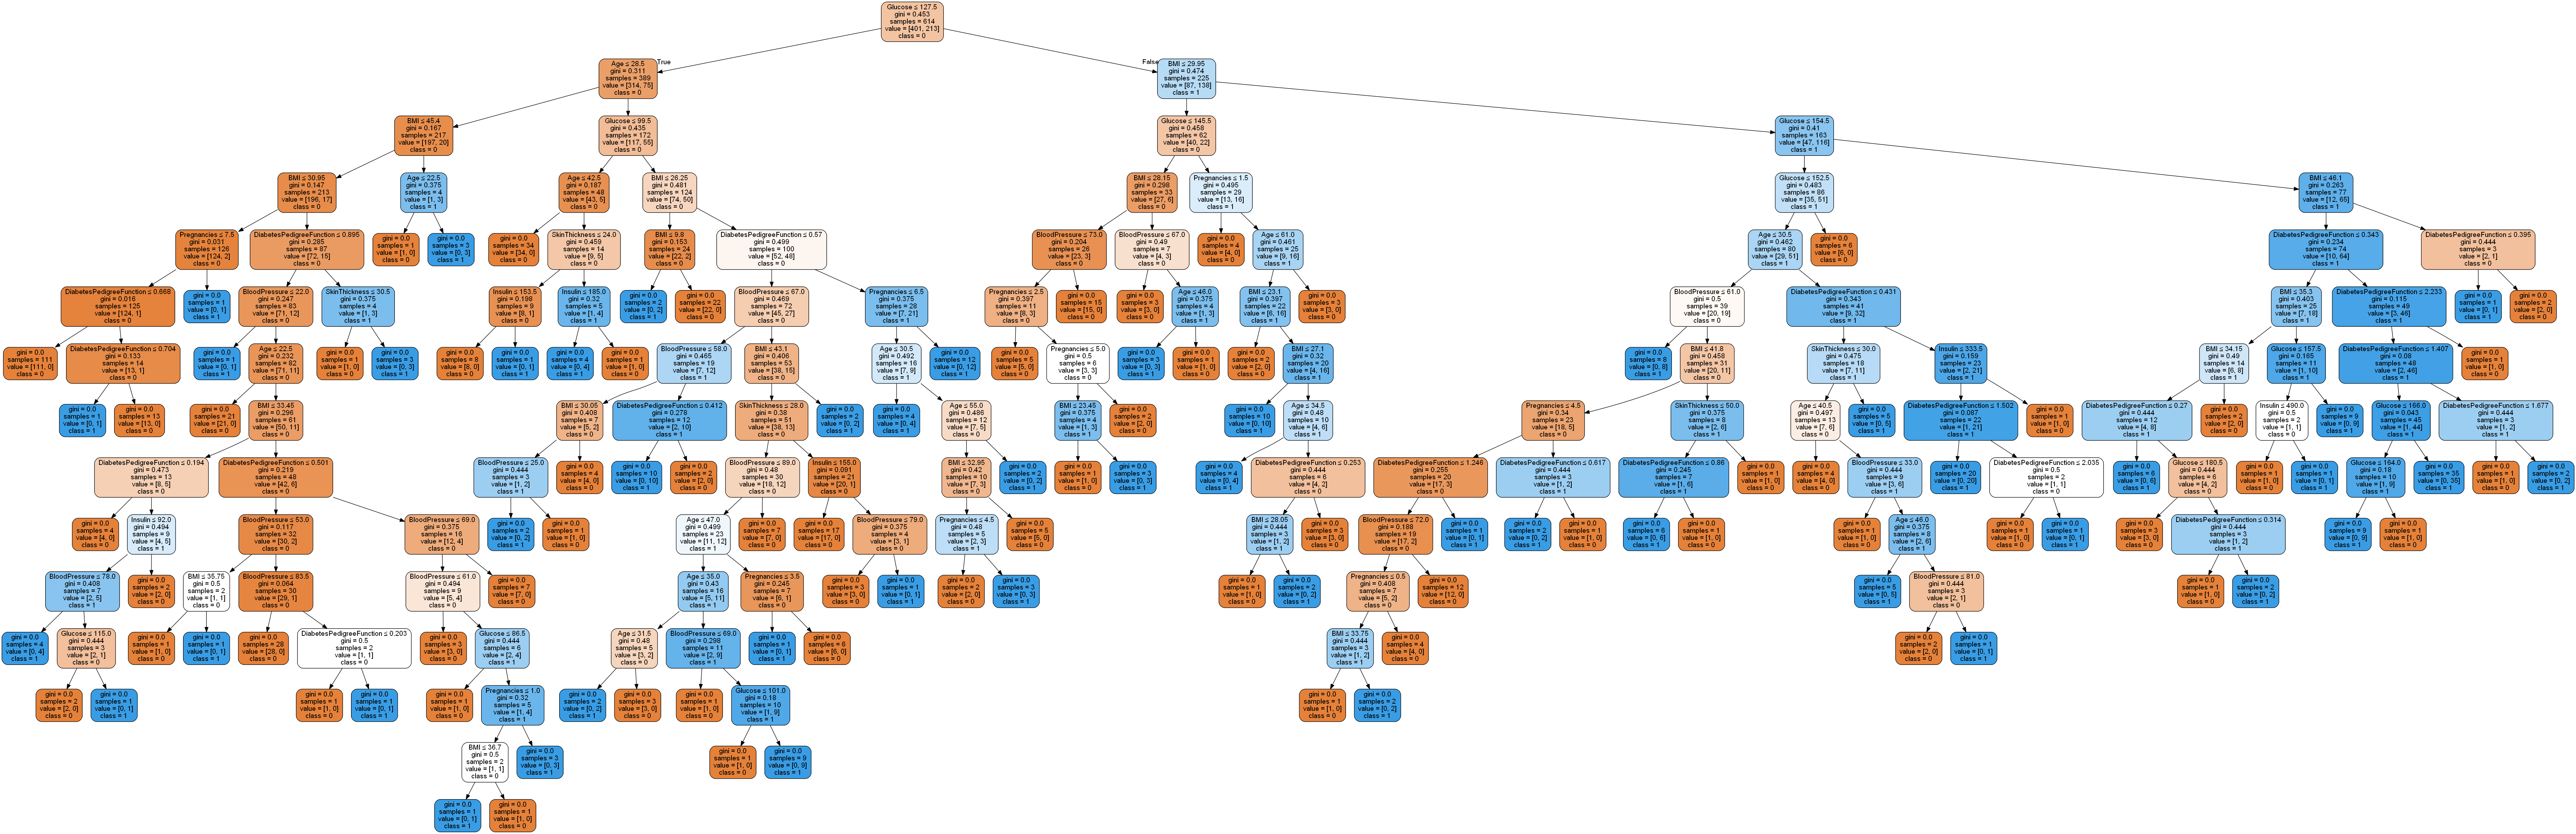

In [76]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

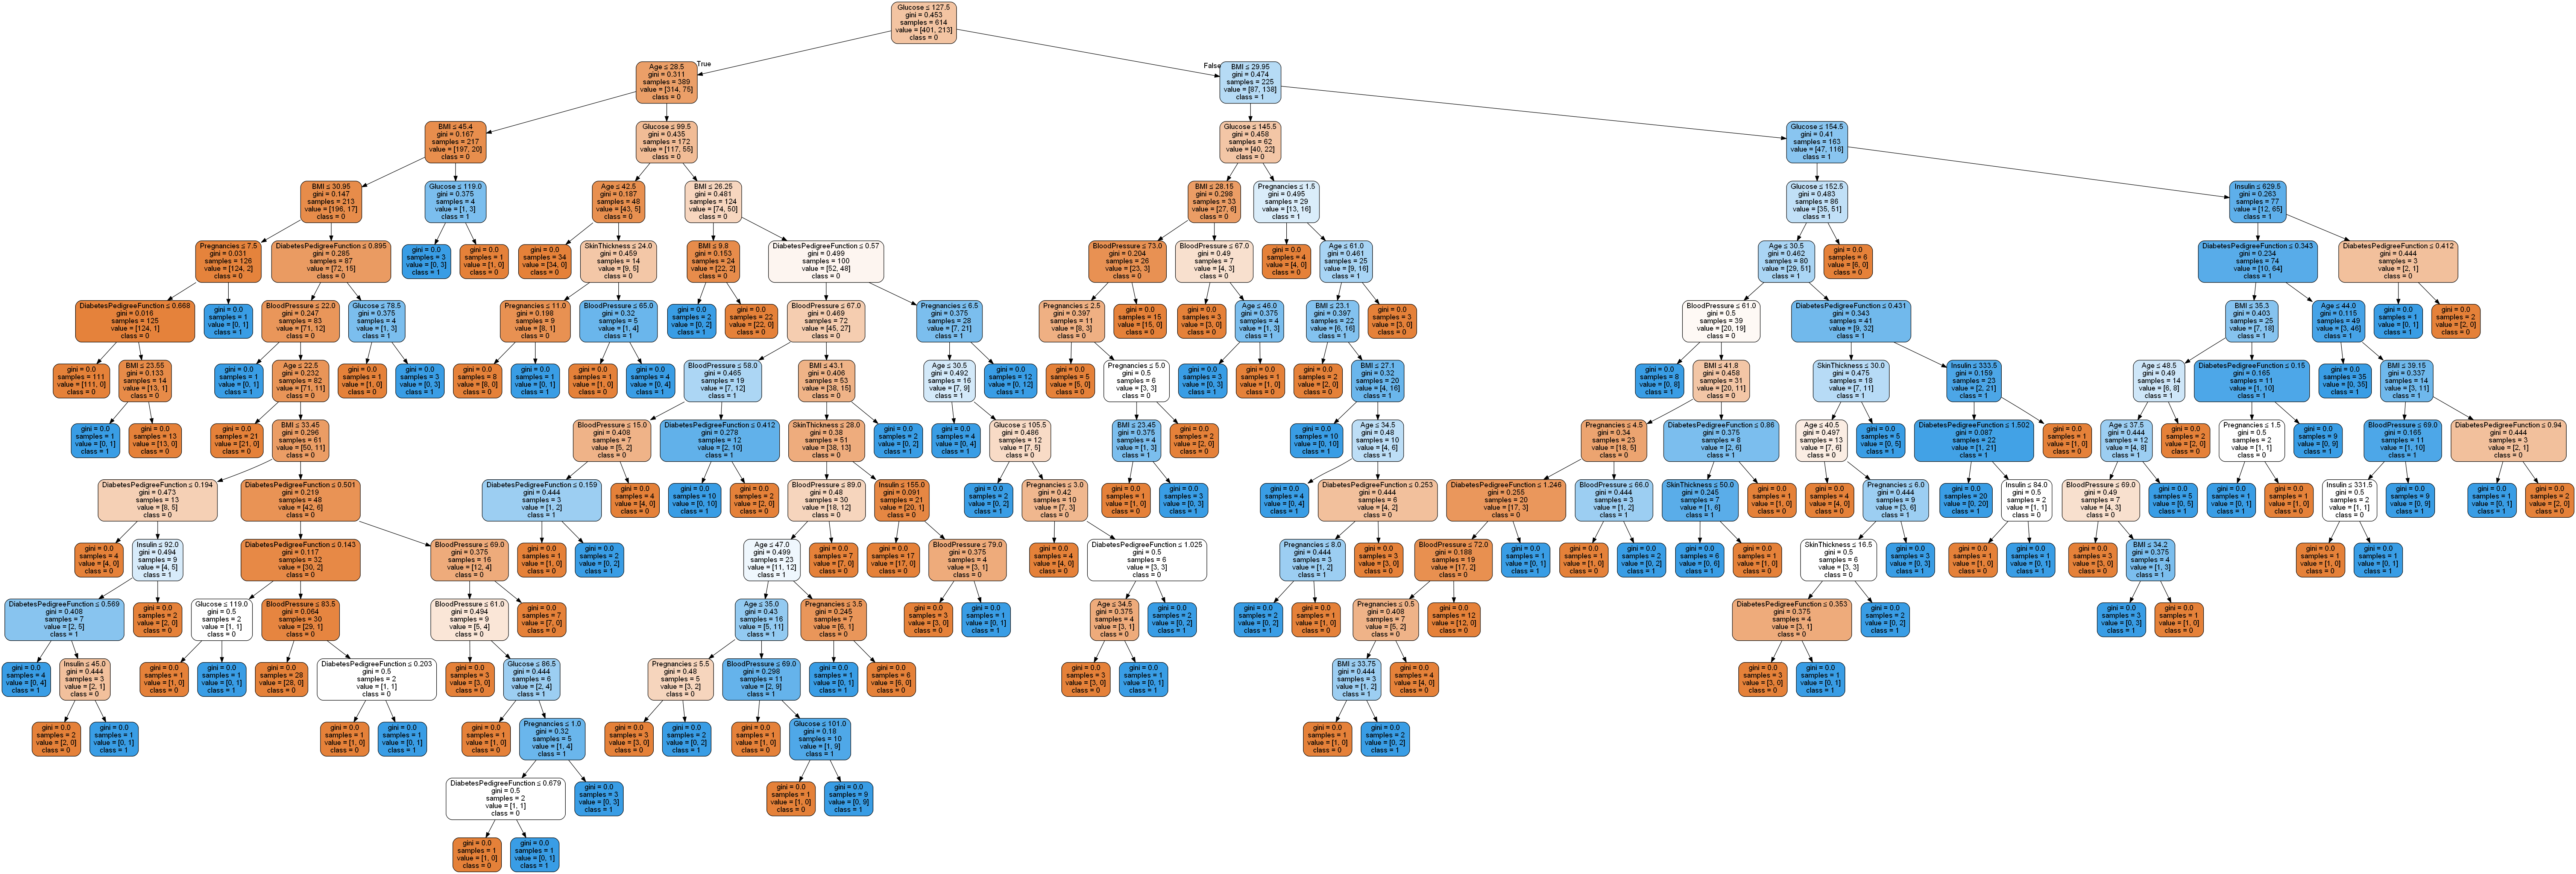

In [30]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [80]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 77.92207792207793


The classification rate increased to 79.87%, which is better accuracy than the previous model.



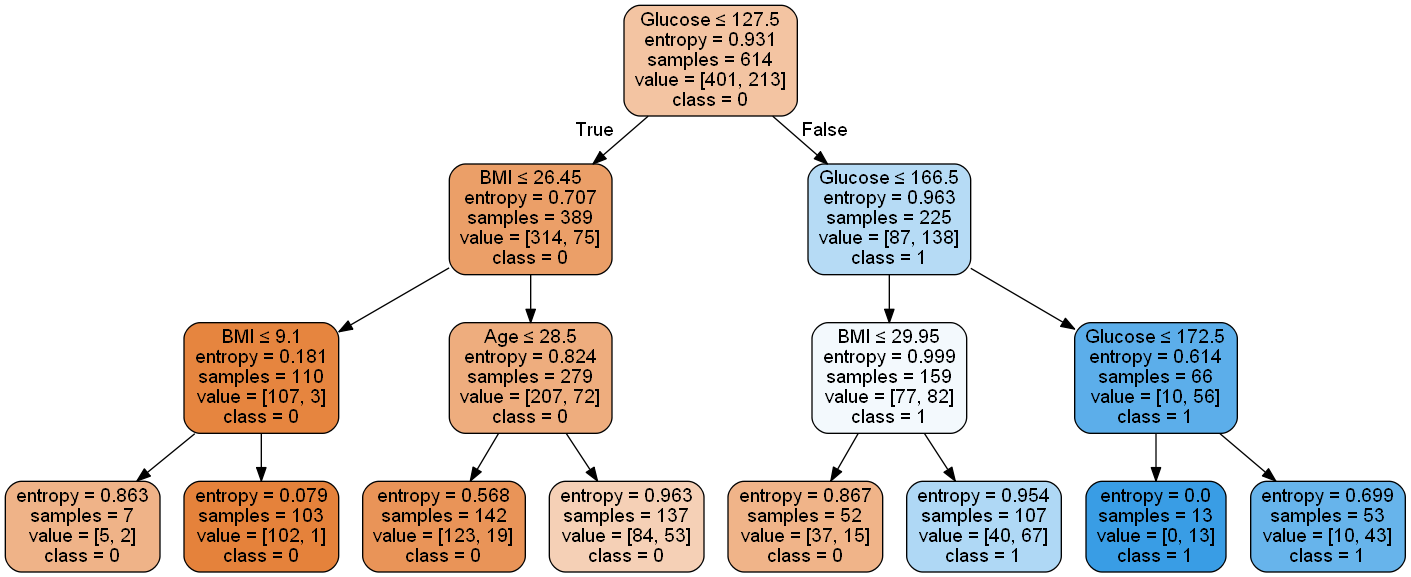

In [32]:
#Better Decision Tree Visualisation
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())